## Fourier Series and Fourier Transform
### this file contains
- generation of Fourier series of given function
- Fourier Transform of \
-- given function and \
-- experimental data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Fourier Series [ Assignment ]

Develope the Fourier series of Triangular wave function
    ![img](https://mathworld.wolfram.com/images/equations/FourierSeriesTriangleWave/NumberedEquation1.gif)

#### 1. Individual basis function terms: 
Plot the individual terms in the above series to compere the periodicity and amplitudes.

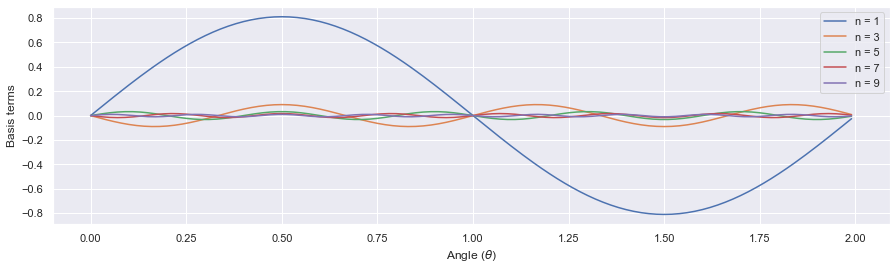

In [2]:
L = 1
ns =100
thetas = np.arange(0,2,1/ns)   # this is x in function

plt.figure(figsize = [15,4])

#for n in (1,3,5,7,9):
for n in [i for i in range(10) if i%2 !=0]:
    '''creating individual terms in the series'''
    fs = (8/np.pi**2)*((-1)**(0.5*(n-1)))*(1/n**2)*np.sin(n*np.pi*thetas/float(L))
    
    plt.plot(thetas,fs,label = "n = "+str(n))
    
plt.legend()
plt.xlabel("Angle ("+r'$\theta$)') 
plt.ylabel("Basis terms")
plt.show()

#### 2.Subsequent development by adding terms
Here we want to observe the plot of terms (e.g., first term, sum of first two terms, sum of first three terms, etc) to realize how final series is developed by summation of individual terms.

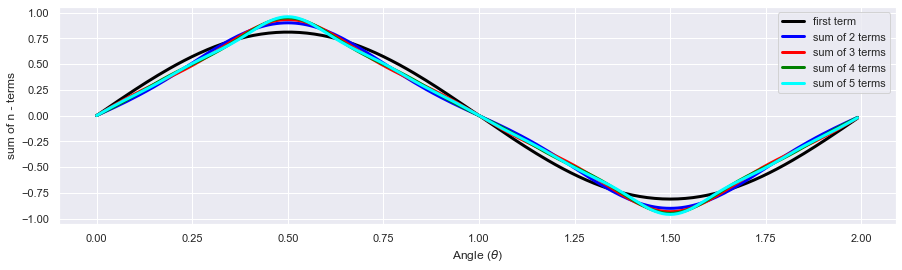

In [3]:
L = 1
ns =100
thetas = np.arange(0,2,1/ns)
plt.figure(figsize = [15,4])
mycolors = ["black", "blue", "red", "green", "cyan"]

k = 1 # we can escape this k. it is for putting legend.
for n in [i for i in range(10) if i%2 != 0]:
    if n == 1:
        '''first term only'''
        funi = (8/np.pi**2)*((-1)**(0.5*(n-1)))*(1/n**2)*np.sin(n*np.pi*thetas/float(L))
        plt.plot(thetas,funi, label = "first term", color = mycolors[k-1], linewidth = 3)
        funf = funi
        
    else:
        '''terms following first term'''
        funi = funf + (8/np.pi**2)*((-1)**(0.5*(n-1)))*(1/n**2)*np.sin(n*np.pi*thetas/float(L))
        plt.plot(thetas,funi, label = "sum of "+str(k)+" terms", color = mycolors[k-1], linewidth = 3)
        
        funf = funi
        
    k = k+1
                 
plt.legend()
plt.xlabel("Angle ("+r'$\theta$)') 
plt.ylabel('sum of n - terms')
plt.show()

#### 3. Sum of all n-terms

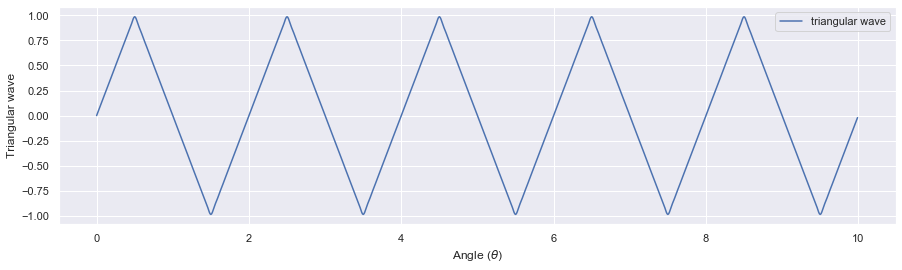

In [4]:
L = 1
ns =100
thetas = np.arange(0,10,1/ns)
plt.figure(figsize = [15,4])

'''including n = 1,3,5,...29th terms in basis expansison'''
fs = sum([(8/np.pi**2)*((-1)**(0.5*(n-1)))*(1/n**2)*np.sin(n*np.pi*thetas/float(L)) for n in [i for i in range(30) if i%2 !=0]])

plt.plot(thetas,fs,label ="triangular wave")
plt.legend()
plt.xlabel("Angle ("+r'$\theta$)') 
plt.ylabel('Triangular wave')
plt.show()

-------------------

### Fourier Transform

#### FFT of given function (Signal without noise)

In [5]:
fs = 100.0
ts= np.arange(0,10,1/fs)
freq_cos = [2,4,6,8,10,15]
freq_sin = [2,4,6,8,10,12]
#freq_sin = [1,3,5,7,9]

'''prepare candidate signals'''
#ft_signal = cos(2pif1t)+sin(2pif2t)
#there are 5 cos fns and 5 sin fns
# so adding them there are 5 ft_signal

ft_signal = [np.cos(2*np.pi*f1*ts) + np.sin(2*np.pi*f2*ts)  for f1,f2 in zip(freq_cos,freq_sin)]

'''resultant signal'''
#add above 5 ft_signal, gives rSignal 
rSignal = sum(ft_signal)

### Use of np.fft.fft  and np.fft.fftfreq
**np.fft.fft(a, n=None, axis=-1, norm=None)** \
Compute the one-dimensional discrete Fourier Transform.\
where,\
a = Input array \
n = Length of the transformed axis of the output \
axis = Axis over which to compute the FFT (-1 for automatic or default) \
norm = Normalization mode (none for default) \

This function computes the one-dimensional n-point discrete Fourier Transform (DFT) with the efficient Fast Fourier Transform (FFT) algorithm.

simply; np.fft.fft(array) \
https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html

**np.fft.fftfreq(n, d=1.0)** \
Return the Discrete Fourier Transform sample frequencies. \
where, \
integer n = Window length \
d = Sample spacing (inverse of the sampling rate). Defaults to 1 \
https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html#numpy.fft.fftfreq

In [6]:
fft_rSignal = np.fft.fft(rSignal)
print(np.shape(fft_rSignal))
#print(fft_rSignal)
#len(fft_rSignal)
fft_freq = np.fft.fftfreq(len(fft_rSignal),1/fs)
print(np.shape(fft_freq))
#print(fft_freq)

(1000,)
(1000,)


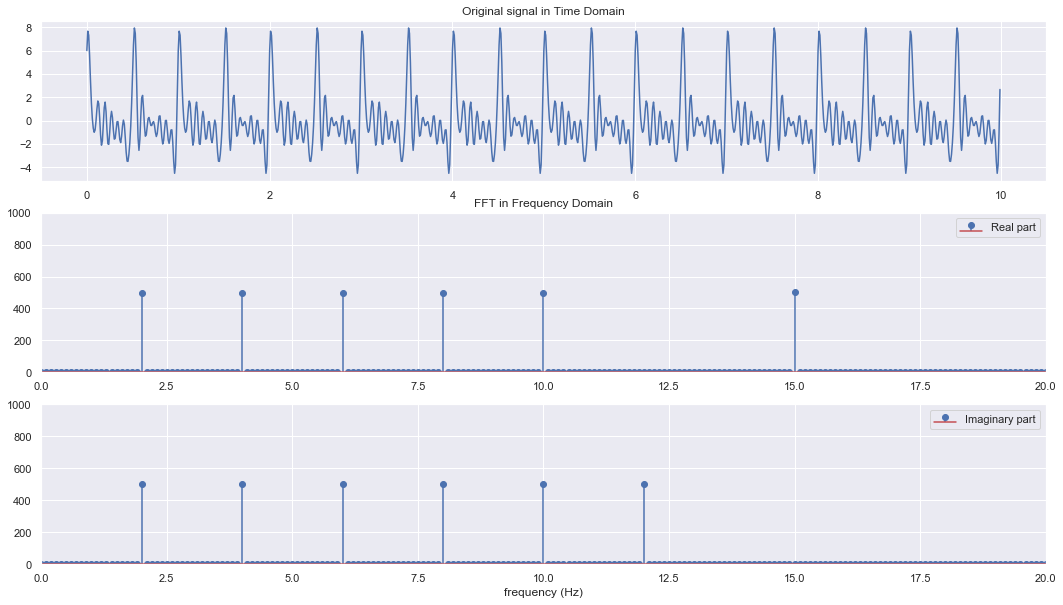

In [7]:
plt.figure(figsize = [18,10])

plt.subplot(311)
plt.plot(ts,rSignal)
plt.title("Original signal in Time Domain")

plt.subplot(312)
plt.stem(fft_freq, abs(fft_rSignal.real), label="Real part", use_line_collection="True")
plt.title("FFT in Frequency Domain")
plt.ylim(0,1000)
plt.xlim(0,20)
plt.legend(loc=1)

plt.subplot(313)
plt.stem(fft_freq, abs(fft_rSignal.imag),label="Imaginary part", use_line_collection="True")
plt.xlabel("frequency (Hz)")
plt.legend(loc=1)
plt.xlim(0,20)
plt.ylim(0,1000)

plt.show()

#### FFT of experimental data 

In [8]:
data = np.loadtxt("waterTF20Gdata4NPSSC2020.dat",delimiter = ',') #
#print(data)
print(data.shape)
texp = data[:,0]
del_t = texp[1]-texp[0]
print(round(del_t,2))
#print(texp)
yexp = data[:,1]
#print(yexp)
timeerror = data[:,2]
#print(yerbar)

(62, 3)
0.16


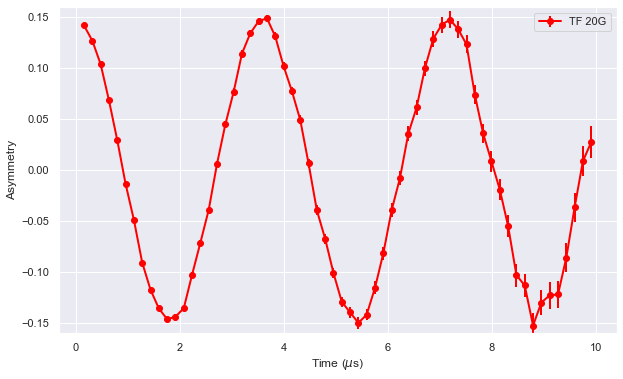

In [9]:
plt.figure(figsize = [10,6])

plt.subplot()
plt.errorbar(texp, yexp, yerr=timeerror,linewidth = 2, linestyle='-',marker='o',label="TF 20G", color = "red")
plt.xlabel("Time ($\mu$s)")
plt.ylabel("Asymmetry")
plt.legend(loc=0)
#plt.xlim(0,10)
plt.ylim(-0.16,0.16)
plt.show()

In [10]:
fft_rsig_noise = np.fft.fft(yexp)
fft_freq_noise = np.fft.fftfreq(len(fft_rsig_noise),del_t)
len(fft_rsig_noise)

62

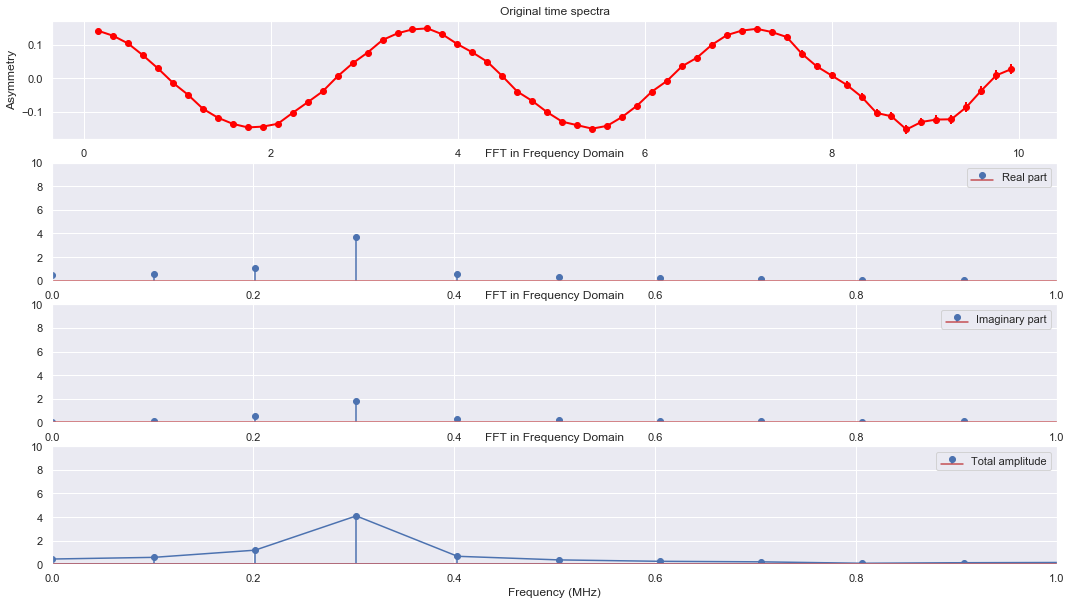

In [18]:
plt.figure(figsize = [18,10])

plt.subplot(411)
plt.errorbar(texp, yexp, yerr=timeerror,linewidth = 2, linestyle='-',marker='o',label="TF 20G", color = "red")
plt.title("Original time spectra")
plt.xlabel("Time ($\mu$s)")
plt.ylabel("Asymmetry")

plt.subplot(412)
plt.stem(fft_freq_noise, abs(fft_rsig_noise.real), label="Real part", use_line_collection="True")
plt.title("FFT in Frequency Domain")
plt.ylim(0,10)
plt.xlim(0,1)
plt.legend(loc=1)

plt.subplot(413)
plt.stem(fft_freq_noise, abs(fft_rsig_noise.imag),label="Imaginary part", use_line_collection="True")
plt.xlabel("frequency (MHz)")
plt.title("FFT in Frequency Domain")
plt.legend(loc=1)
plt.ylim(0,10)
plt.xlim(0,1)

plt.subplot(414)
plt.plot(fft_freq_noise, ((fft_rsig_noise.real**2 + fft_rsig_noise.imag**2))**(0.5))
plt.stem(fft_freq_noise, ((fft_rsig_noise.real**2 + fft_rsig_noise.imag**2))**(0.5), label="Total amplitude", use_line_collection="True")
plt.title("FFT in Frequency Domain")
plt.xlabel("Frequency (MHz)")
plt.ylim(0,10)
plt.xlim(0,1)
plt.legend(loc=1)
plt.show()

**Agrrement with calculated frequency** \
$\omega$ = $\gamma_\mu$ $\times$ field

$\gamma_\mu$ = 0.01355387 MHz/G 

$\omega$ at  20G = 0.01355387 $\times$ 20 = 0.2710774 MHz
- slightly deviated from calculated frequency may be due the deviation(fluction) of magnetic field...
